## Importing Packages and Data

In [3]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [4]:
# read datasets
listing = pd.read_csv("~/Documents/udacity/project_1/seattle_airbnb/archive/listings.csv")
calendar = pd.read_csv("~/Documents/udacity/project_1/seattle_airbnb/archive/calendar.csv")
reviews = pd.read_csv("~/Documents/udacity/project_1/seattle_airbnb/archive/reviews.csv")

## Data Understanding and Preparing

In [5]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
# take a look at all columns for listing
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [7]:
# To answer question: What's the most popular neighbourhood in Seattle?
listing[['neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed']]

,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
0,Queen Anne,West Queen Anne,Queen Anne
1,Queen Anne,West Queen Anne,Queen Anne
2,Queen Anne,West Queen Anne,Queen Anne
3,Queen Anne,West Queen Anne,Queen Anne
4,Queen Anne,West Queen Anne,Queen Anne
...,...,...,...
3813,Fremont,Fremont,Other neighborhoods
3814,Portage Bay,Portage Bay,Capitol Hill
3815,NaN,Rainier Beach,Rainier Valley
3816,NaN,Madison Park,Capitol Hill


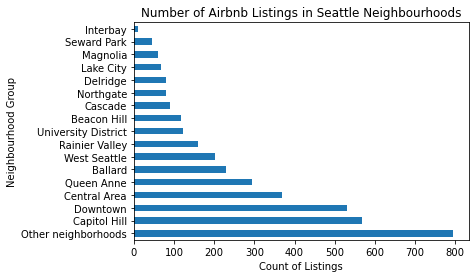

In [8]:
# plot the number of Airbnb listings in Seattle neighbourhoods
listing['neighbourhood_group_cleansed'].value_counts().plot(kind = 'barh')
plt.xlabel("Count of Listings")
plt.ylabel("Neighbourhood Group")
plt.title("Number of Airbnb Listings in Seattle Neighbourhoods");

In [9]:
listing[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
         'review_scores_communication', 'review_scores_location', 'review_scores_value']]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,92.0,9.0,9.0,10.0,10.0,9.0,9.0
...,...,...,...,...,...,...,...
3813,80.0,8.0,10.0,4.0,8.0,10.0,8.0
3814,100.0,10.0,10.0,10.0,10.0,10.0,10.0
3815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3816,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# To answer question: Which neighborhood in Seattle has the highest Airbnb review values?
listing.groupby('neighbourhood_group_cleansed').mean().sort_values('review_scores_value', ascending = False)[['review_scores_value']]

,review_scores_value
neighbourhood_group_cleansed,
Delridge,9.676923
Interbay,9.666667
Northgate,9.661538
West Seattle,9.641975
Rainier Valley,9.611940
Queen Anne,9.591837
Central Area,9.572327
Lake City,9.571429
Ballard,9.569948


In [11]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


## Question 1

In [12]:
# extract month and year from date
get_month = lambda date: dt.datetime.strptime(date, '%Y-%m-%d').month
calendar['month'] = calendar['date'].apply(get_month)
get_year = lambda date: dt.datetime.strptime(date, '%Y-%m-%d').year
calendar['year'] = calendar['date'].apply(get_year)

In [13]:
# change available column from f, t to 0, 1
calendar['available'] = calendar['available'].map({'f': 0, 't': 1})

In [14]:
# take a look at the calendar dataset after data processing
calendar.head()

,listing_id,date,available,price,month,year
0,241032,2016-01-04,1,$85.00,1,2016
1,241032,2016-01-05,1,$85.00,1,2016
2,241032,2016-01-06,0,NaN,1,2016
3,241032,2016-01-07,0,NaN,1,2016
4,241032,2016-01-08,0,NaN,1,2016


In [15]:
# exploration of the year and month in calendar dataset
calendar['year'].value_counts()

2016    1385934
2017       7636
Name: year, dtype: int64

In [16]:
calendar.loc[calendar['year'] == 2017, 'month'].value_counts()

1    7636
Name: month, dtype: int64

Most of listings are from year 2016. Only 7636 listings are from year 2017. All listings in year 2017 are in January.

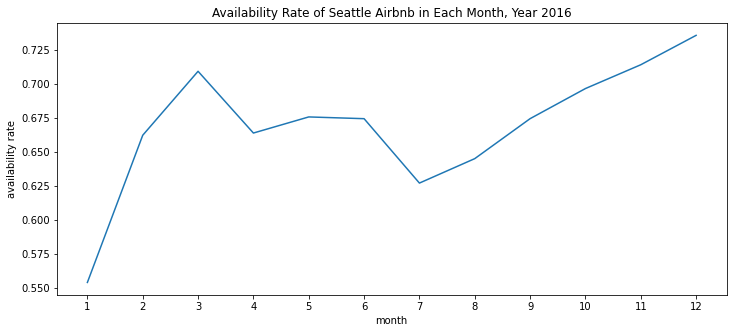

In [17]:
# calculate availablity rate
availability_rate = calendar[calendar['year'] == 2016].groupby('month').mean()['available']
# plot availablity rate in each month
fig, ax = plt.subplots(1, 1, figsize = (12, 5))
ax.set_xticks(list(range(1,13)))
plt.xlabel('month')
plt.ylabel('availability rate')
plt.title('Availability Rate of Seattle Airbnb in Each Month, Year 2016')
plt.plot(availability_rate)

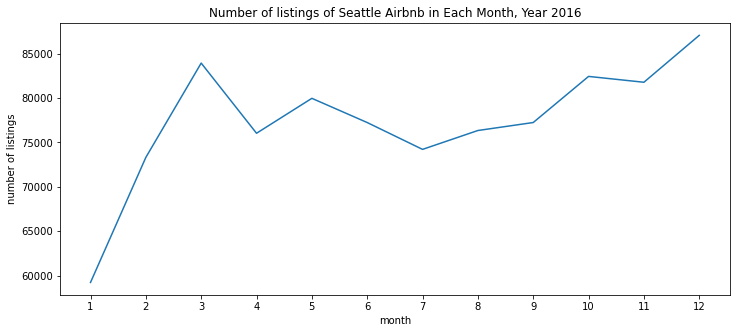

In [18]:
# calculate total number of listings available in each month
num_listing = calendar[calendar['year'] == 2016].groupby('month').sum()['available']
# plot number of listing in each month
fig, ax = plt.subplots(1, 1, figsize = (12, 5))
ax.set_xticks(list(range(1,13)))
plt.xlabel('month')
plt.ylabel('number of listings')
plt.title('Number of listings of Seattle Airbnb in Each Month, Year 2016')
plt.plot(num_listing)

In [19]:
# extract price as float based on price column
calendar['price'] = calendar['price'].str.replace('$', '').str.replace(',', '').astype("float")

<ipython-input-19-bd20e2722236>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  calendar['price'] = calendar['price'].str.replace('$', '').str.replace(',', '').astype("float")


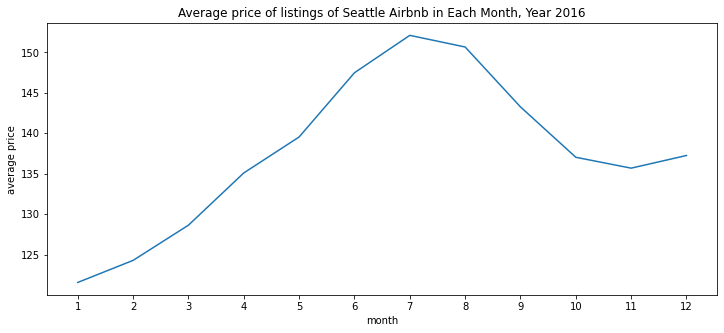

In [20]:
# calculate average price of listings available in each month
ave_price = calendar[(calendar['year'] == 2016) & (calendar['available'] == 1)].groupby('month').mean()['price']
# plot average price in each month
fig, ax = plt.subplots(1, 1, figsize = (12, 5))
ax.set_xticks(list(range(1,13)))
plt.xlabel('month')
plt.ylabel('average price')
plt.title('Average price of listings of Seattle Airbnb in Each Month, Year 2016')
plt.plot(ave_price)

## Question 2

In [21]:
# select several columns for analysis
selected_col = ['review_scores_value','accommodates', 'bathrooms', 'bedrooms', 'beds', 'cancellation_policy', "id",
             'host_is_superhost', 'extra_people', 'property_type', 'room_type', 'price', 'neighbourhood_group_cleansed'] 
listing_sel = listing[selected_col]

In [22]:
# prepare listing dataset for analysis
listing_sel['price'] = listing_sel['price'].str.replace('$', '').str.replace(',', '').astype("float")
listing_sel['extra_people'] = listing_sel['extra_people'].str.replace('$', '').str.replace(',', '').astype("float")
listing_sel['host_is_superhost'] = listing_sel['host_is_superhost'].map({'f': 0, 't': 1})
listing_sel.head()

<ipython-input-22-e22f34888e91>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  listing_sel['price'] = listing_sel['price'].str.replace('$', '').str.replace(',', '').astype("float")
<ipython-input-22-e22f34888e91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_sel['price'] = listing_sel['price'].str.replace('$', '').str.replace(',', '').astype("float")
<ipython-input-22-e22f34888e91>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=Tru

,review_scores_value,accommodates,bathrooms,bedrooms,beds,cancellation_policy,id,host_is_superhost,extra_people,property_type,room_type,price,neighbourhood_group_cleansed
0,10.0,4,1.0,1.0,1.0,moderate,241032,0.0,5.0,Apartment,Entire home/apt,85.0,Queen Anne
1,10.0,4,1.0,1.0,1.0,strict,953595,1.0,0.0,Apartment,Entire home/apt,150.0,Queen Anne
2,10.0,11,4.5,5.0,7.0,strict,3308979,0.0,25.0,House,Entire home/apt,975.0,Queen Anne
3,NaN,3,1.0,0.0,2.0,flexible,7421966,0.0,0.0,Apartment,Entire home/apt,100.0,Queen Anne
4,9.0,6,2.0,3.0,3.0,strict,278830,0.0,15.0,House,Entire home/apt,450.0,Queen Anne


In [23]:
# calculate average price of each neighbourhood
listing_sel.groupby('neighbourhood_group_cleansed').mean().sort_values('price', ascending = False)[['price']]

,price
neighbourhood_group_cleansed,
Magnolia,177.672131
Queen Anne,157.223729
Downtown,154.405660
West Seattle,141.359606
Cascade,140.101124
Capitol Hill,130.592593
Central Area,128.338753
Ballard,124.682609
Other neighborhoods,119.968514


In [24]:
# calculate the number of unique of listings in each neighbourhood
listing_sel.groupby('neighbourhood_group_cleansed').agg({"id": "nunique"}).sort_values('id', ascending = False)

,id
neighbourhood_group_cleansed,
Other neighborhoods,794
Capitol Hill,567
Downtown,530
Central Area,369
Queen Anne,295
Ballard,230
West Seattle,203
Rainier Valley,159
University District,122


In [25]:
# get the number of house for each neighbourhood
listing_sel_filtered = listing_sel.loc[listing_sel['property_type'].isin(['House'])]
house_count = listing_sel_filtered.groupby(['neighbourhood_group_cleansed']).count()[['id']]
house_count['neighbourhood_group_cleansed'] = house_count.index
house_count.reset_index(drop = True, inplace = True)
house_count.rename({'id': "house_count"}, axis = 1, inplace = True)
house_count.head()

,house_count,neighbourhood_group_cleansed
0,146,Ballard
1,76,Beacon Hill
2,168,Capitol Hill
3,9,Cascade
4,216,Central Area


In [26]:
# get the number of apartment for each neighbourhood
listing_sel_filtered = listing_sel.loc[listing_sel['property_type'].isin(['Apartment'])]
apt_count = listing_sel_filtered.groupby(['neighbourhood_group_cleansed']).count()[['id']]
apt_count['neighbourhood_group_cleansed'] = apt_count.index
apt_count.reset_index(drop = True, inplace = True)
apt_count.rename({'id': "apt_count"}, axis = 1, inplace = True)
apt_count.head()

,apt_count,neighbourhood_group_cleansed
0,60,Ballard
1,23,Beacon Hill
2,356,Capitol Hill
3,68,Cascade
4,102,Central Area


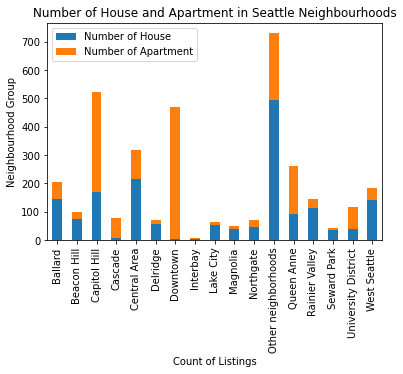

In [27]:
# plot the number of house and apartment in Seattle neighbourhoods
df_plot = house_count.merge(apt_count, how = "outer", on = "neighbourhood_group_cleansed")
df_plot.plot(x = 'neighbourhood_group_cleansed', kind = 'bar', stacked = True)
plt.xlabel("Count of Listings")
plt.ylabel("Neighbourhood Group")
plt.legend(["Number of House", "Number of Apartment"])
plt.title("Number of House and Apartment in Seattle Neighbourhoods");

## Question 3

<AxesSubplot:>

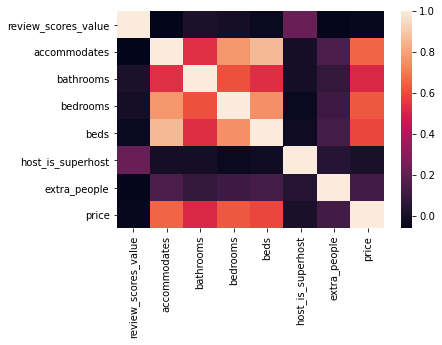

In [28]:
# generate correlation heatmap
listing_model = listing_sel.drop('id', axis = 1)
sns.heatmap(listing_model.corr())

In [29]:
# There is no missing values for price
listing_model['price'].isnull().value_counts()

False    3818
Name: price, dtype: int64

In [30]:
listing_model.isnull().sum()

review_scores_value             656
accommodates                      0
bathrooms                        16
bedrooms                          6
beds                              1
cancellation_policy               0
host_is_superhost                 2
extra_people                      0
property_type                     1
room_type                         0
price                             0
neighbourhood_group_cleansed      0
dtype: int64

Random forest model does not accept missing values in covariates. There are missing values for variables review_scores_value, bathrooms, bedrooms, beds, host_is_superhost, property. We have to either drop or impute missing values for those covariates. Since there are a large proportion of review_scores_value missing, we want to exclude the review_scores_value from modeling. Based on the correlation heatmap, the review_scores_value has very low correlation with price so we don't lose much by droping the covariate. For other covariates, we will impute the missing values by the mode.

In [31]:
# drop review_scores_value column
listing_model.drop('review_scores_value', axis = 1, inplace = True)

In [62]:
# impute other columns
fill_by_mode = lambda col: col.fillna(col.mode()[0])
listing_model_fill = listing_model.apply(fill_by_mode)

In [63]:
# check to make sure there is no missing value
listing_model_fill.isnull().sum()

accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
cancellation_policy             0
host_is_superhost               0
extra_people                    0
property_type                   0
room_type                       0
price                           0
neighbourhood_group_cleansed    0
dtype: int64

In [64]:
# generate dummy variables for categorical variables
listing_model_dummy = pd.get_dummies(listing_model_fill, drop_first = True)
listing_model_dummy

,accommodates,bathrooms,bedrooms,beds,host_is_superhost,extra_people,price,cancellation_policy_moderate,cancellation_policy_strict,property_type_Bed & Breakfast,...,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle
0,4,1.0,1.0,1.0,0.0,5.0,85.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,4,1.0,1.0,1.0,1.0,0.0,150.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,11,4.5,5.0,7.0,0.0,25.0,975.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,3,1.0,0.0,2.0,0.0,0.0,100.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,6,2.0,3.0,3.0,0.0,15.0,450.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,6,2.0,3.0,3.0,0.0,0.0,359.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3814,4,1.0,1.0,2.0,0.0,25.0,79.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3815,2,1.0,1.0,1.0,0.0,20.0,93.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3816,2,1.0,0.0,1.0,0.0,0.0,99.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# split training and test data
y = listing_model_dummy['price']
x = listing_model_dummy.drop('price', axis = 1)

In [71]:
# fit a random forest model
model = RandomForestRegressor(n_estimators = 500, criterion = 'mse', random_state = 1, n_jobs = -1)
model.fit(x, y)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=1)

<AxesSubplot:>

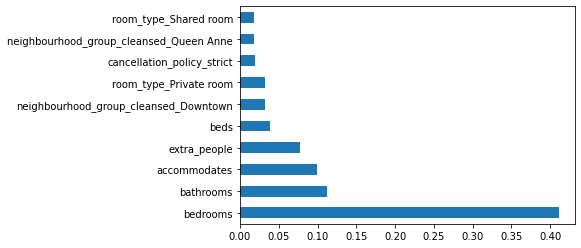

In [76]:
# plot feature importance by variable
feat_importances = pd.Series(model.feature_importances_, index=x.columns).sort_values()
feat_importances.nlargest(10).plot(kind = 'barh')